### 0. Importación de librerías y carga de datos

In [26]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# q-q plots
import scipy.stats as stats

# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

In [27]:
# Se cargan los datos
# Ubicación de los datos, deben estar en la misma carpeta que este notebook

#pais, liga = "belgica", "jupiler-pro-league"
#pais, liga = "espana", "laliga"
#pais, liga = "espana", "laliga-smartbank"
#pais, liga = "francia", "ligue-1"
#pais, liga = "francia", "ligue-2"
#pais, liga = "inglaterra", "championship"
#pais, liga = "inglaterra", "premier-league"
#pais, liga = "italia", "serie-a"
#pais, liga = "italia", "serie-b"
#pais, liga = "paises-bajos", "eredivisie"
#pais, liga = "portugal", "liga-portugal"
#pais, liga = "turquia", "super-lig"
#pais, liga = "colombia", "primera-a"
pais, liga = "brasil", "brasileirao-serie-a"


version = 0

db_location = f"data/{pais}_{liga}/version{version}/resultados_anteriores.csv"

# Se leen los datos, estan separados con ','
data = pd.read_csv(db_location, sep=',', encoding = 'utf-8', na_values = '-')

### 1. Entendimiento de los datos

In [28]:
# Se revisa la forma general de los datos cargados
data.shape

(178, 42)

In [29]:
# Se muestra una pequeña muestra de los datos
data.head()

,Date,HomeTeam,AwayTeam,HG,AG,HP,AP,HTS,ATS,HSI,...,ATP,HPC,APC,HT,AT,HA,AA,HDA,ADA,Resultado
0,06.08.2023 18:00,Cuiabá,Flamengo,3,0,42%,58%,16,9,7,...,539.0,264.0,474.0,NaN,NaN,70,122,46,87,3
1,06.08.2023 16:30,Bahia,América-MG,3,1,61%,39%,22,8,7,...,260.0,417.0,187.0,NaN,NaN,119,73,62,20,2
2,06.08.2023 16:30,Coritiba,Bragantino,0,1,50%,50%,9,11,1,...,357.0,299.0,261.0,NaN,NaN,89,102,53,48,-1
3,06.08.2023 16:30,Cruzeiro,Botafogo,0,0,59%,41%,13,2,4,...,270.0,515.0,203.0,NaN,NaN,153,61,53,12,0
4,06.08.2023 14:00,Sao Paulo,Atlético-MG,0,2,62%,38%,16,8,2,...,290.0,545.0,220.0,NaN,NaN,152,65,79,23,-2


In [30]:
# Se imprimen los diferentes tipos de las columnas. Todas son numéricas
data.dtypes

Date          object
HomeTeam      object
AwayTeam      object
HG             int64
AG             int64
HP            object
AP            object
HTS            int64
ATS            int64
HSI            int64
ASI            int64
HSO            int64
ASO            int64
HBS          float64
ABS          float64
HFK          float64
AFK          float64
HC             int64
AC             int64
HOFF           int64
AOFF           int64
HTI          float64
ATI          float64
HGS            int64
AGS            int64
HF             int64
AF             int64
HRC          float64
ARC          float64
HYC          float64
AYC          float64
HTP          float64
ATP          float64
HPC          float64
APC          float64
HT           float64
AT           float64
HA             int64
AA             int64
HDA            int64
ADA            int64
Resultado      int64
dtype: object

In [31]:
# Se hace una decripción de los datos
data.describe()

,HG,AG,HTS,ATS,HSI,ASI,HSO,ASO,HBS,ABS,...,ATP,HPC,APC,HT,AT,HA,AA,HDA,ADA,Resultado
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,168.000000,168.000000,...,167.000000,167.000000,167.000000,22.000000,22.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.410112,1.028090,14.910112,11.061798,5.258427,3.859551,6.612360,4.910112,3.220238,2.428571,...,432.221557,366.658683,354.940120,18.000000,16.818182,111.365169,103.168539,52.803371,41.140449,0.382022
std,1.137600,1.021961,5.034661,4.468547,2.426446,2.154340,3.106629,2.804921,2.225130,1.780034,...,109.651002,101.128022,107.795752,4.800794,5.662209,26.072396,24.902856,17.538033,15.962790,1.569523
min,0.000000,0.000000,5.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,197.000000,142.000000,135.000000,10.000000,9.000000,45.000000,45.000000,9.000000,12.000000,-5.000000
25%,0.000000,0.000000,12.000000,8.000000,4.000000,2.000000,4.000000,3.000000,2.000000,1.000000,...,358.000000,299.500000,282.500000,14.500000,13.000000,90.000000,87.250000,41.000000,29.250000,-1.000000
50%,1.000000,1.000000,14.000000,10.000000,5.000000,4.000000,6.000000,5.000000,3.000000,2.000000,...,426.000000,359.000000,341.000000,17.500000,15.000000,113.000000,102.000000,50.500000,38.500000,0.000000
75%,2.000000,2.000000,18.000000,14.750000,7.000000,5.000000,9.000000,6.000000,4.000000,4.000000,...,517.000000,431.500000,441.500000,20.750000,19.750000,127.750000,120.750000,64.000000,51.000000,1.750000
max,5.000000,5.000000,30.000000,22.000000,15.000000,11.000000,18.000000,14.000000,12.000000,8.000000,...,722.000000,651.000000,643.000000,28.000000,28.000000,179.000000,187.000000,115.000000,105.000000,4.000000


### 2. Identificación de variables a utilizar

In [32]:
selected_cols = ['HTS', 'ATS', 'HSI', 'ASI', 'HSO', 'ASO', 'HBS', 'ABS', 'HGS', 'AGS', 'HRC', 'ARC']
#selected_cols2 = ['HP', 'AP', 'HFK', 'AFK', 'HC', 'AC', 'HOFF', 'AOFF', 'HTI', 'ATI', 'HF', 'AF', 'HRC', 'ARC',
#                    'HYC', 'AYC', 'HTP', 'ATP', 'HPC', 'APC', 'HT', 'AT', 'HA', 'AA', 'HDA', 'ADA']
#selected_cols = [ # "Date", "HomeTeam", "AwayTeam",
                  # 'HTS', 'ATS',
#                    'HSI', 'ASI', 'HSO', 'ASO', 'HBS', 'ABS', 'HGS', 'AGS',
#                    'HP', 'AP', 'HFK', 'AFK', 'HC', 'AC', 'HOFF', 'AOFF', 'HTI', 'ATI', 'HF', 'AF', 'HRC', 'ARC',
#                    'HYC', 'AYC', 'HTP', 'ATP', 'HPC', 'APC', # 'HT', 'AT',
#                    'HA', 'AA', 'HDA', 'ADA']


### 3. Limpieza y preparación de datos

In [33]:
# los pasos de limpieza y preparación se realizan sobre otro archivo
df_data = data.copy()[selected_cols]
df_data.insert(0, "Resultado", data["Resultado"])

In [34]:
# Se observa que no existen valores nulos en las variables
df_data.isnull().sum()

Resultado      0
HTS            0
ATS            0
HSI            0
ASI            0
HSO            0
ASO            0
HBS           10
ABS           10
HGS            0
AGS            0
HRC          144
ARC          144
dtype: int64

In [35]:
# Se ajusta el formato de la posesión
def convert_possession(value):
    if len(value) > 0:
        value2 = str(value)  # cast to string
        value3 = value2[:-1] # last four characters

        return float(value3)
    else:
        return value

#df_data['HP'] = df_data['HP'].apply(convert_possession)
#df_data['AP'] = df_data['AP'].apply(convert_possession)

In [36]:
# Se ajustan las tarjetas amarillas
def convert_yellow_cards(value):
    return int(value)

#df_data['HYC'] = df_data['HYC'].fillna(0)
#df_data['AYC'] = df_data['AYC'].fillna(0)
#df_data['HYC'] = df_data['HYC'].apply(convert_yellow_cards)
#df_data['AYC'] = df_data['AYC'].apply(convert_yellow_cards)

In [37]:
# Se ajustan las tarjetas rojas
df_data['HRC'] = df_data['HRC'].fillna(0)
df_data['ARC'] = df_data['ARC'].fillna(0)

In [38]:
# Se llenan los valores vacios de HBS y ABS
#df_data['HBS'] = df_data['HBS'].fillna(0)
#df_data['ABS'] = df_data['ABS'].fillna(0)

In [39]:
# Se llenan los valores vacios de HFK y AFK
#df_data['HFK'] = df_data['HFK'].fillna(0)
#df_data['AFK'] = df_data['AFK'].fillna(0)

In [40]:
# Se llenan los valores vacios de HTI y ATI
#df_data['HTI'] = df_data['HTI'].fillna(0)
#df_data['ATI'] = df_data['ATI'].fillna(0)

In [41]:
# Se llenan los valores vacios de HTP y ATP           
#df_data['HTP'] = df_data['HTP'].fillna(0)
#df_data['ATP'] = df_data['ATP'].fillna(0)

In [42]:
# Se llenan los valores vacios de HPC y APC
#df_data['HPC'] = df_data['HPC'].fillna(0)
#df_data['APC'] = df_data['APC'].fillna(0)

In [43]:
# Se llenan los valores vacios de HT y AT
#df_data['HT'] = df_data['HT'].fillna(0)
#df_data['AT'] = df_data['AT'].fillna(0)

In [44]:
df_data.isnull().sum()

Resultado     0
HTS           0
ATS           0
HSI           0
ASI           0
HSO           0
ASO           0
HBS          10
ABS          10
HGS           0
AGS           0
HRC           0
ARC           0
dtype: int64

In [45]:
df_data.shape

(178, 13)

In [46]:
df_data = df_data.dropna()
df_data.shape

(168, 13)

In [47]:
# Se llenan los valores nulos con el promedio de local o visitante de ese equipo (según el archivo)
def fill_based_on_another_column(row):
    if pd.isnull(row['HTP']):
        #print(row[["Date", "HomeTeam", "AwayTeam", "HG", "AG"]])
        #if row['another_column'] == 'A':
        #    return 'value_for_A'
        return row['HTP']
    return row['HTP']

# Fill null values in the 'column_name' column based on 'another_column'
#df_data['HTP'] = df_data.apply(fill_based_on_another_column, axis=1)

In [48]:
df_data.head()
output_file = 'output.xlsx'
df_data.to_excel(output_file, index=False)

<AxesSubplot:>

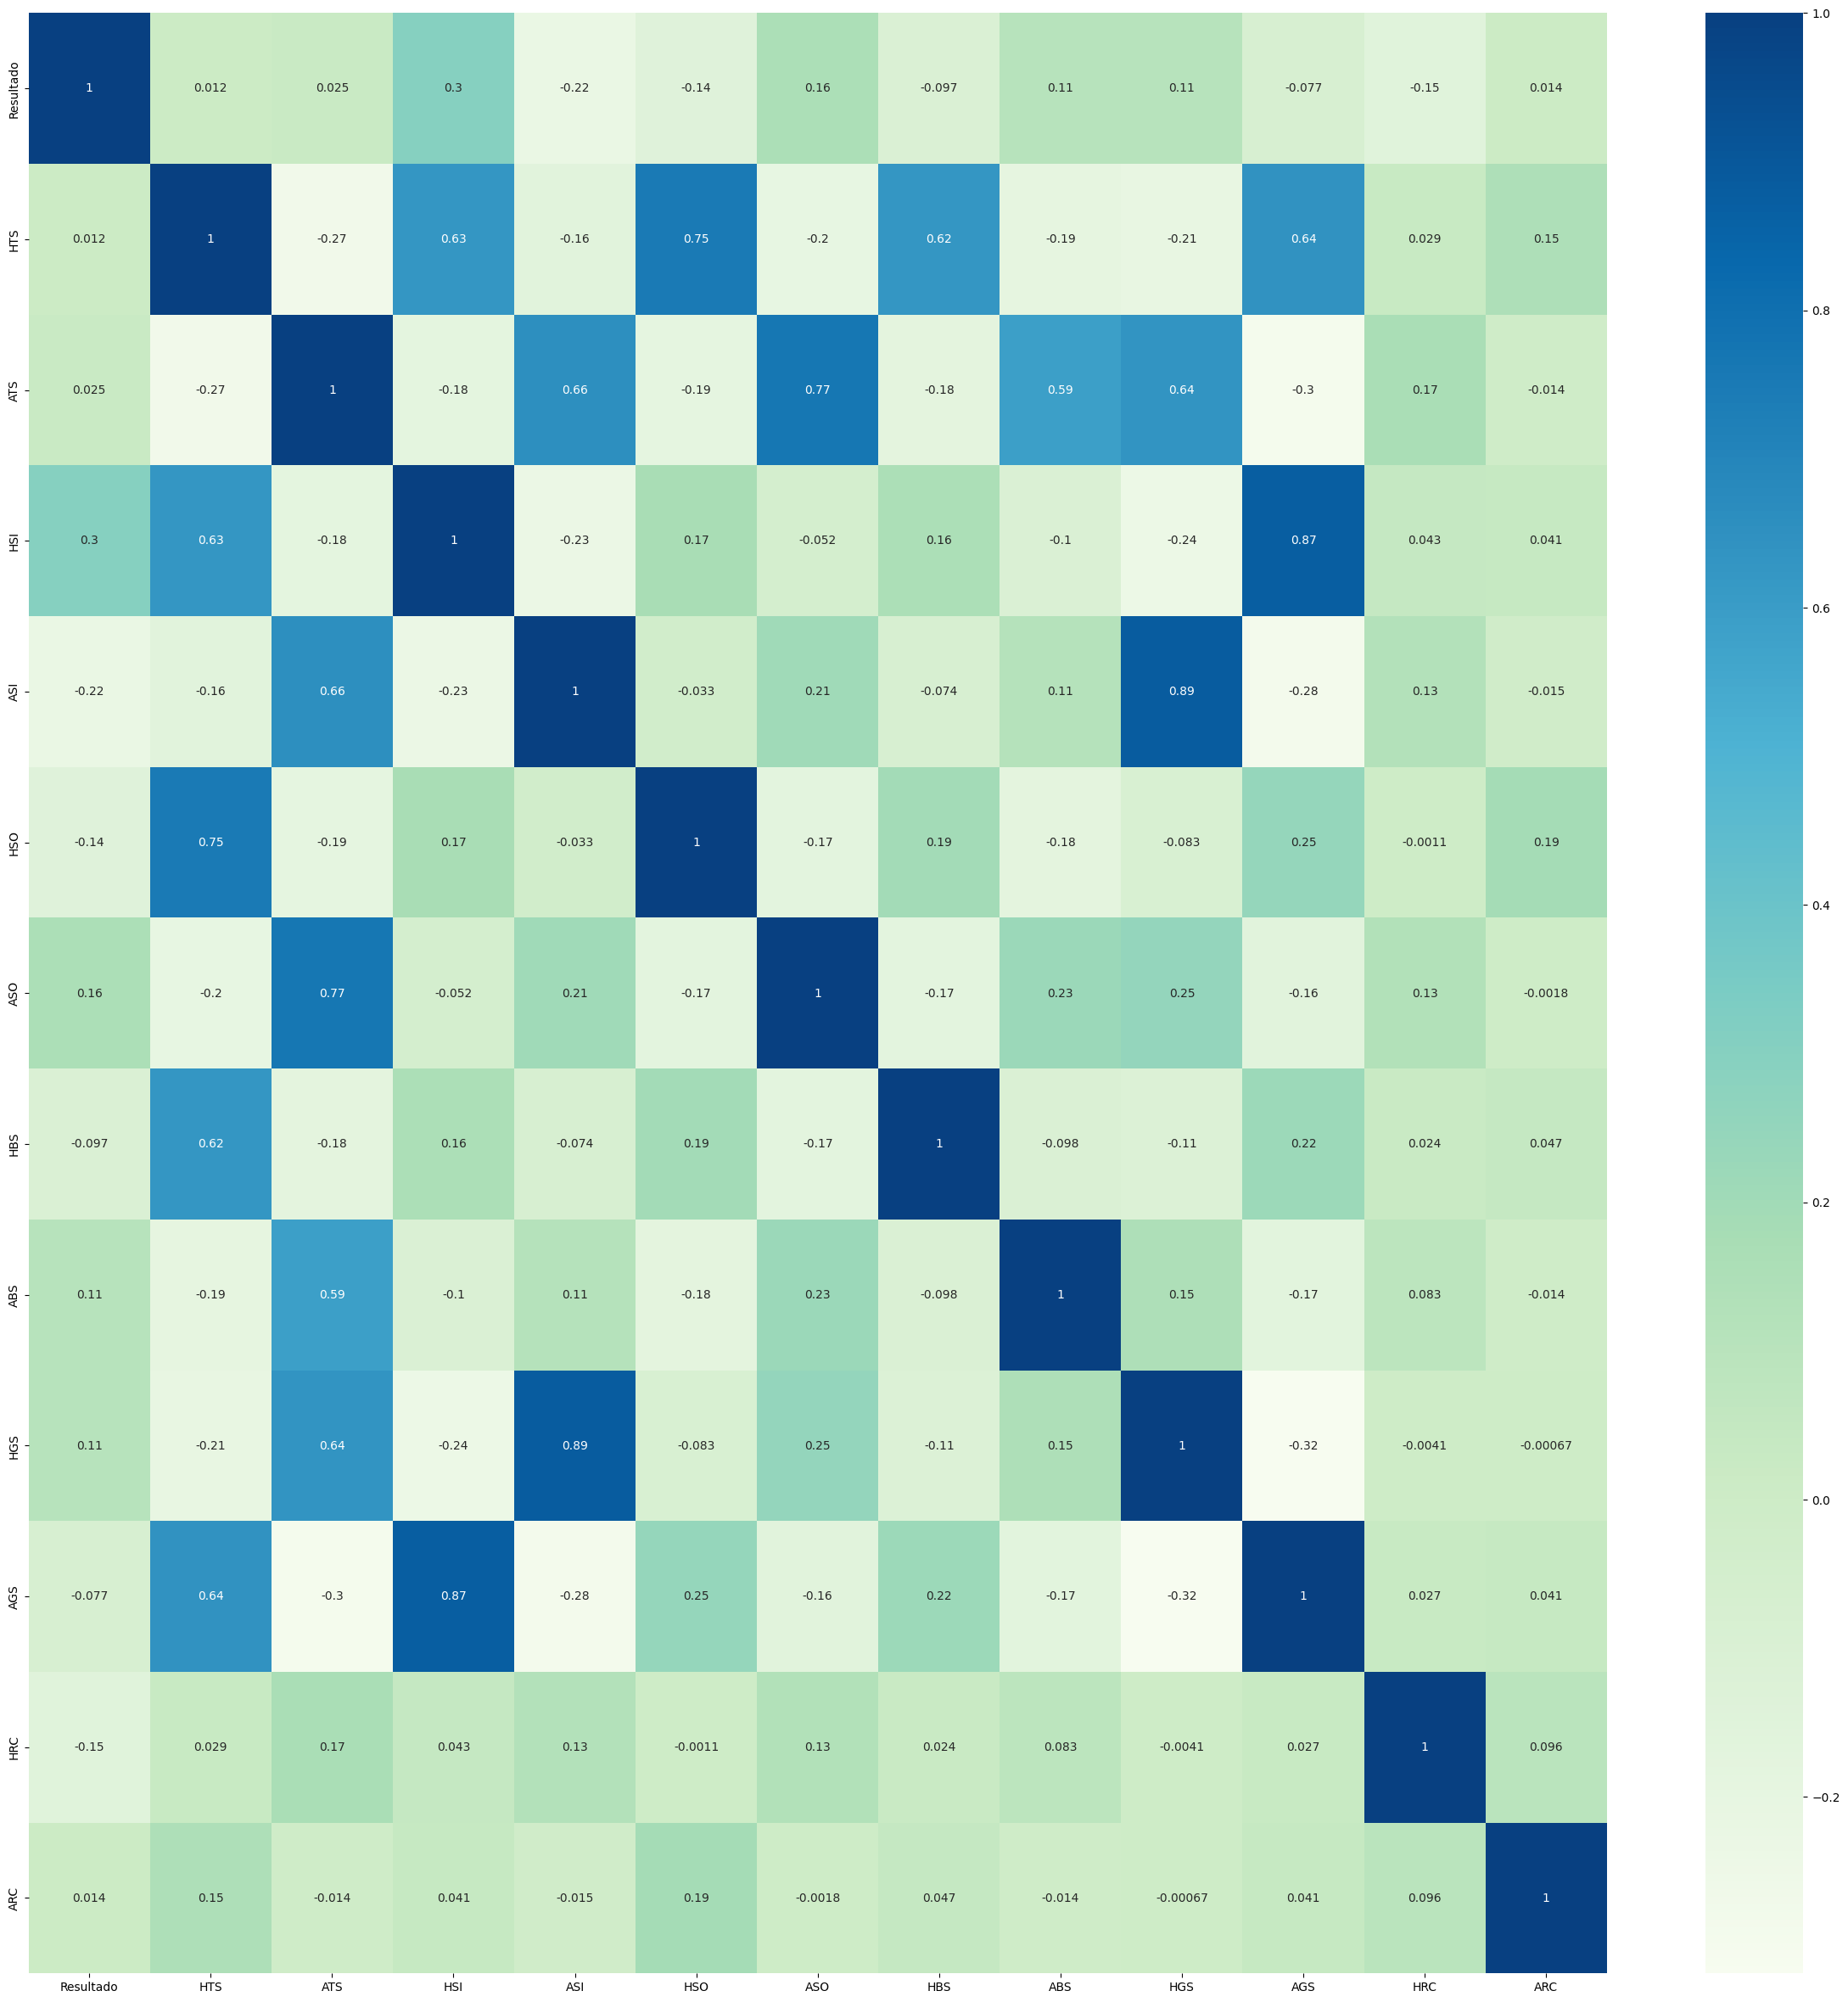

In [49]:
# Se revisa si la variable objetivo está correlacionada con otra variable
plt.figure(figsize =(30,30))
correlacion = df_data.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

In [50]:
# Se diagrama la relación entre cada variable explicativa y la variable objetivo
#sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[0:4], kind='scatter')
#sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[4:10], kind='scatter')
#sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[8:12], kind='scatter')
#sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[12:16], kind='scatter')
#sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[16:20], kind='scatter')
#sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[20:24], kind='scatter')
#sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[24:28], kind='scatter')
#sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[28:32], kind='scatter')

### 4. Modelamiento

In [51]:
#df_data.drop('Date', axis = 1, inplace=True)
#df_data.drop('HomeTeam', axis = 1, inplace=True)
#df_data.drop('AwayTeam', axis = 1, inplace=True)

#### Pipeline 1: solo con selección de variables

In [52]:
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),]
# Se declara el modelo
model = [('model', LinearRegression())]
# Se declara el pipeline
pipeline1 = Pipeline(pre+model)

In [53]:
# Se extraen las variables explicativas y objetivo para entrenar
df_datap1 = df_data

X = df_datap1.drop('Resultado', axis = 1)
Y = df_datap1['Resultado']

# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Se entrena el modelo
pipeline1 = pipeline1.fit(X_train,Y_train)

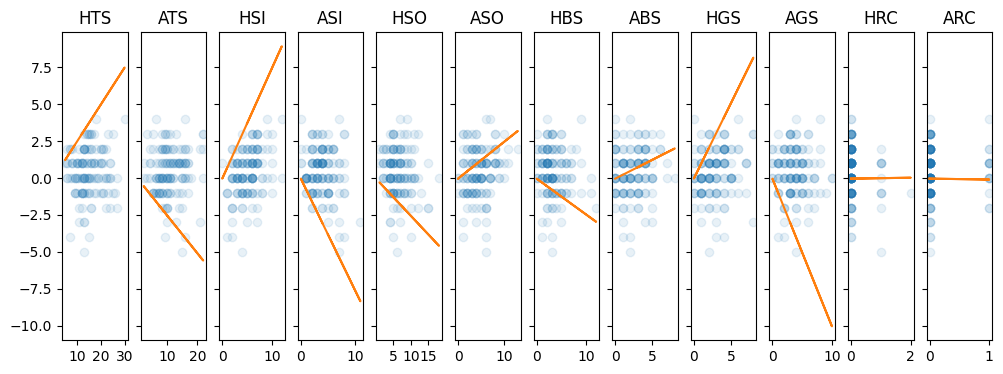

In [54]:
# Se visualiza la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):
    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X_train[col]
    # Pendiente
    m = pipeline1['model'].coef_[pos_col]
    # Interceto
    b = pipeline1['model'].intercept_

    axs[i].plot(x, Y_train, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

In [55]:
# Vale la pena hacer estandarización de los datos para tener coeficientes más comparables en misma escala.
importancia = pipeline1['model'].coef_
pd.options.display.float_format = '{:.5f}'.format
importancia_atributo = pd.DataFrame(data={"Atributo": selected_cols,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,HGS,1.02499
1,HSI,0.74763
2,ABS,0.25556
3,HTS,0.25105
4,ASO,0.24776
5,HRC,0.03128
6,ARC,-0.06105
7,HBS,-0.24382
8,ATS,-0.25232
9,HSO,-0.25277


In [56]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred = pipeline1.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #1 - Datos de entrenamiento")
print("RMSE: %.2f" % np.sqrt(mse(Y_train, y_pred)))
print('R²: %.2f' % r2_score(Y_train, y_pred))

Estadísticas Pipeline #1 - Datos de entrenamiento
RMSE: 0.17
R²: 0.99


In [57]:
# Se obtienen las predicciones del modelo sobre el conjunto de test.
y_pred = pipeline1.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #1 - Datos de test")
print("RMSE: %.2f" % np.sqrt(mse(Y_test, y_pred)))
print('R²: %.2f' % r2_score(Y_test, y_pred))

Estadísticas Pipeline #1 - Datos de test
RMSE: 0.04
R²: 1.00


<AxesSubplot:>

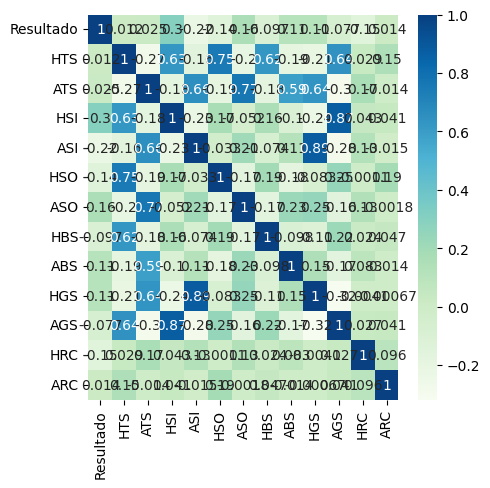

In [58]:
# Se revisa la colinealidad
df_temp = df_datap1[selected_cols]
plt.figure(figsize =(5,5))
correlacion = df_datap1.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

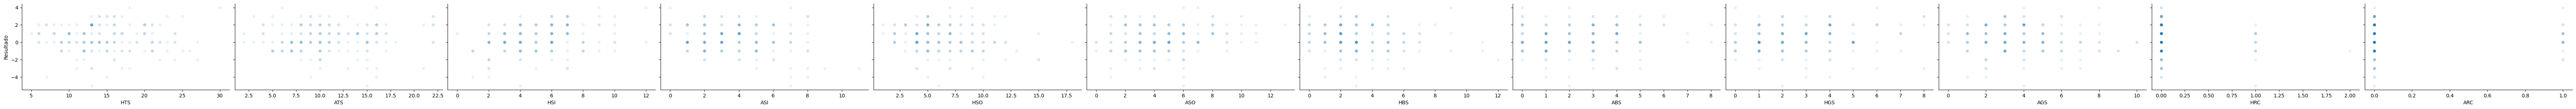

In [59]:
# Linealidad
#Se ven datos relativamente juntos, sin embargo, hay una pequeña cantidad de datos fuera de esta cohesión en las tres variables.
sns.pairplot(df_datap1, height=3, aspect = 2, y_vars = 'Resultado', x_vars = selected_cols, kind='scatter', plot_kws = {'alpha':0.1})

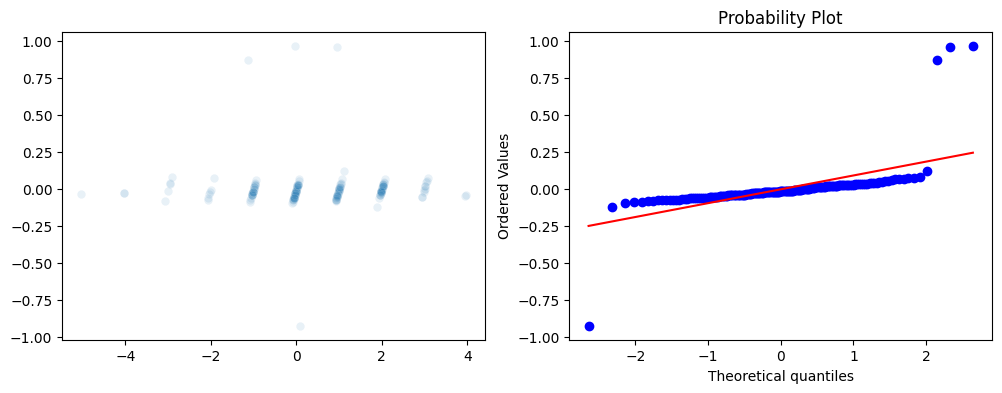

In [60]:
# Nos sirve para revisar si los errores vienen con una distribución teoríca. En este caso, de una distribución normal.
X = df_data.drop('Resultado', axis = 1)
y = df_data['Resultado']

# Calculamos los errores
errors = (pipeline1.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = pipeline1.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

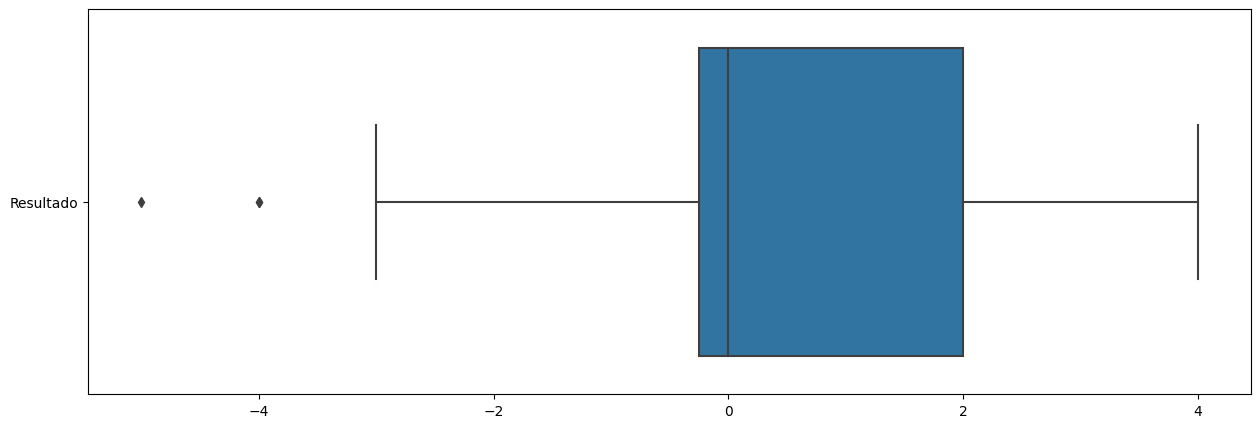

In [61]:
# Diagrama de caja
# Acá podemos ver los valores atípicos de Life expectancy.
# En este caso están los menores a 44.5.
fig=plt.figure(figsize=(15,5))
ax = sns.boxplot(data= df_datap1[['Resultado']], orient="h")

#### Pipeline 2: Modelo con eliminación de valores atípicos en la variable objetivo y estandarización

In [62]:
# Se eliminan los valores atípicos que indica el diagrama de caja.
df_datap2 = df_data
df_datap2 = df_datap2.drop(df_datap2[df_datap2['Resultado'] <= -2].index)
df_datap2 = df_datap2.drop(df_datap2[df_datap2['Resultado'] > 2].index)

In [63]:
# Se declara el modelo
model2 = [('model2', LinearRegression())]

#Pre
pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),
       ('scaler', StandardScaler()),]

# Se declara el pipeline
pipeline2 = Pipeline(pre+model2)

# Se extraen las variables explicativas y objetivo para entrenar
X = df_datap2.drop('Resultado', axis = 1)
Y = df_datap2['Resultado']

# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

# Se entrena el modelo
pipeline2 = pipeline2.fit(X_train,Y_train)

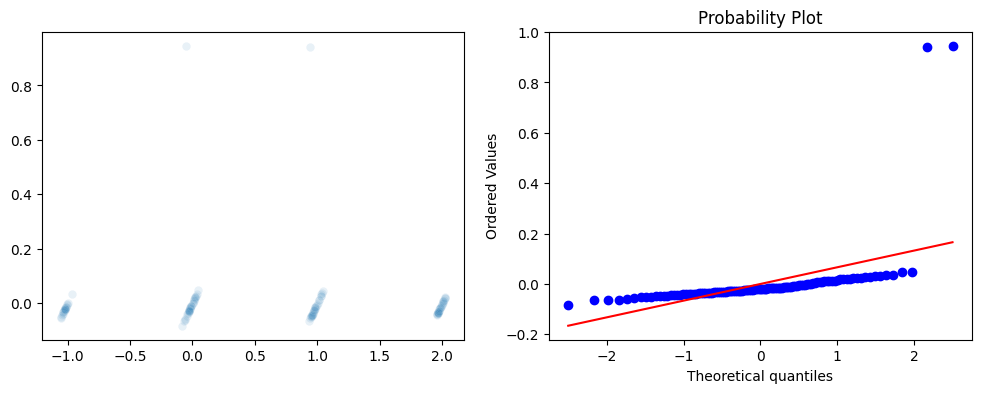

In [64]:
# Se calculan los errores
errors = (pipeline2.predict(X_train) - Y_train).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = pipeline2.predict(X_train), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

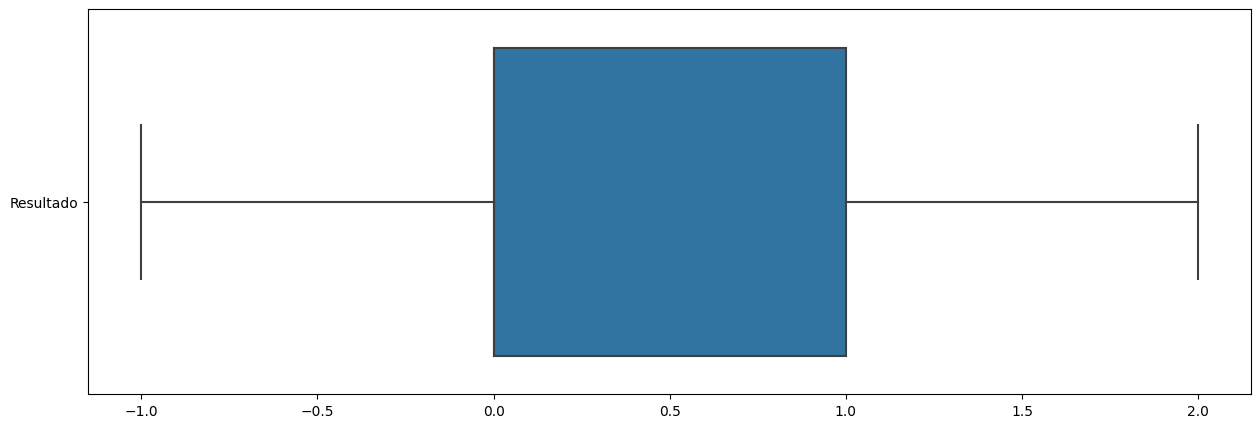

In [65]:
# Diagrama de caja
# Se ve que los datos ya están eliminados
fig=plt.figure(figsize=(15,5))
ax = sns.boxplot(data= df_datap2[['Resultado']], orient="h")

In [66]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred = pipeline2.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #2 - Datos de entrenamiento")
print("RMSE: %.2f" % np.sqrt(mse(Y_train, y_pred)))
print('R²: %.2f' % r2_score(Y_train, y_pred))

Estadísticas Pipeline #2 - Datos de entrenamiento
RMSE: 0.13
R²: 0.99


In [67]:
# Se obtienen las predicciones del modelo sobre el conjunto de test.
y_pred = pipeline2.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #2 - Datos de test")
print("RMSE: %.2f" % np.sqrt(mse(Y_test, y_pred)))
print('R²: %.2f' % r2_score(Y_test, y_pred))

Estadísticas Pipeline #2 - Datos de test
RMSE: 0.19
R²: 0.96


### 5. Evaluación cuantitativa

In [68]:
# Se ajusta el modelo para ver el reporte de estadísticas
model = sm.OLS(Y, X).fit()
# Se muestran las estadísticas del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Resultado   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              859.7
Date:                Mon, 07 Aug 2023   Prob (F-statistic):                   2.99e-114
Time:                        17:47:53   Log-Likelihood:                          74.935
No. Observations:                 141   AIC:                                     -129.9
Df Residuals:                     131   BIC:                                     -100.4
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HTS            0.2473      0.004     64.881      0.000       0.240       0.255
ATS           -0.2521      0.005    -51.849      0.000      -0.262      -0.243
HSI            0.7361      0.011     68.707      0.000       0.715       0.757
ASI           -0.7579      0.013    -56.771      0.000      -0.784      -0.732
HSO           -0.2455      0.005    -46.688      0.000      -0.256      -0.235
ASO            0.2511      0.007     38.453      0.000       0.238       0.264
HBS           -0.2432      0.006    -41.216      0.000      -0.255      -0.232
ABS            0.2547      0.007     35.887      0.000       0.241       0.269
HGS            1.0195      0.019     54.694      0.000       0.983       1.056
AGS           -0.9909      0.015    -65.374      0.000      -1.021      -0.961
HRC            0.0194      0.043      0.451      0.652      -0.066       0.104
ARC            0.0007      0.043      0.018      0.986      -0.083       0.085
==============================================================================
Omnibus:                      130.449   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9341.163
Skew:                          -2.534   Prob(JB):                         0.00
Kurtosis:                      42.551   Cond. No.                     1.77e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.15e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
# Se guarda el pipeline en el archivo
filename = 'model/modelo.joblib' # Ubicación del archivo a entregar
dump(pipeline2, filename)

['model/modelo.joblib']

In [70]:
# Proceso de prueba del cliente
df_recent = pd.read_csv(f"data/{pais}_{liga}/version{version}/proximos_partidos.csv", sep=',', encoding = 'utf-8', na_values = '-') # Lectura de los datos recientes
df_recent['HP'] = df_recent['HP'].apply(convert_possession)
df_recent['AP'] = df_recent['AP'].apply(convert_possession)


# Se lee el archivo y carga el modelo
pipeline = load(filename)

y_predicted = pipeline.predict(df_recent)

In [71]:
for i in y_predicted[:29]:
    print ("{:.2f}".format(i).replace('.', ','))

2,76
-0,61
1,34
-0,24
0,23
3,50
0,69
0,44
0,62
1,21
0,36
-1,05
-0,65
0,72
-0,09
0,32
0,09
-0,84
0,79
-2,06
1,40
-0,78
0,92
0,78
1,27
1,59
3,18
-0,42
1,45


In [72]:
for i in range(len(y_predicted[:29])):
    home_team = df_recent.iloc[i]["HomeTeam"]
    away_team = df_recent.iloc[i]["AwayTeam"]
    
    print(home_team + " vs " + away_team)
    print(y_predicted[i])
    ganador = home_team if y_predicted[i] >= 0.5 else (away_team if y_predicted[i] <= -0.5 else "ninguno")
    if ganador == "ninguno":
            print("No hay ganador claro. " + str(abs(y_predicted[i]))[:4])
    else:
        print("Gana " + ganador + " por " + str(abs(y_predicted[i]))[:4] + " goles")
    print()

Botafogo vs Internacional
2.764708894567382
Gana Botafogo por 2.76 goles

Atlético-MG vs Bahia
-0.60546514020133
Gana Bahia por 0.60 goles

América-MG vs Goiás
1.3409293597466123
Gana América-MG por 1.34 goles

Corinthians vs Coritiba
-0.2383452733841045
No hay ganador claro. 0.23

Gremio vs Fluminense
0.2255334230565209
No hay ganador claro. 0.22

Flamengo vs Sao Paulo
3.4988992385205164
Gana Flamengo por 3.49 goles

Fortaleza vs Santos
0.6882981248343878
Gana Fortaleza por 0.68 goles

Palmeiras vs Cruzeiro
0.4445045375247464
No hay ganador claro. 0.44

Bragantino vs Vasco
0.6172124600358269
Gana Bragantino por 0.61 goles

Athletico-PR vs Cuiabá
1.2141198563367022
Gana Athletico-PR por 1.21 goles

Sao Paulo vs Botafogo
0.359235173278194
No hay ganador claro. 0.35

Cuiabá vs Palmeiras
-1.0533252808121372
Gana Palmeiras por 1.05 goles

Fluminense vs América-MG
-0.6513435838105275
Gana América-MG por 0.65 goles

Cruzeiro vs Corinthians
0.7247834145047642
Gana Cruzeiro por 0.72 goles

Vas